<a href="https://colab.research.google.com/github/nurmuhammadfadilah/UAS-AI-20220801114-Nur-Muhammad-Fadilah/blob/main/Clustring-KMeans-dan-Klasifikasi-RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penerapan Machine Learning pada Dataset Netflix: K-Means Clustering dan Klasifikasi Random Forest**

## Import data dari kaggle

In [ ]:
!pip install kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

# Download the dataset
!kaggle datasets download -d anandshaw2001/netflix-movies-and-tv-shows -p /content/

# Unzip the dataset if necessary
!unzip /content/netflix-movies-and-tv-shows.zip -d /content/

Dataset URL: https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 26.1MB/s]
Archive:  /content/netflix-movies-and-tv-shows.zip
  inflating: /content/netflix_titles.csv  


## Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

## Import Dataset

In [ ]:
file_path = 'netflix_titles.csv'

## Menampilkan Dataset

In [ ]:
df = pd.read_csv(file_path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Menampilkan kolom yang ada pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Deskripsi dalam dataset

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Dimensi dataset

In [ ]:
df.shape

(8807, 12)

## Ukuran dataset

In [ ]:
df.size

105684

## Menampilkan jumlah baris yang duplikat

In [ ]:
df.duplicated().sum()

0

 ## Menghitung jumlah data yang hilang

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


## Menampilan kolom yang ada pada dataset

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Mengganti data yang hilang pada kolom `director` menjadi `notknown`

In [ ]:
df['director'] = df['director'].fillna('notknown')
df['director'].isnull().sum()

0

## Mengganti data yang hilang pada kolom `country` menjadi `unknown`

In [ ]:
df['country'] = df['country'].fillna('unknown')
df['country'].isnull().sum()

0

## Menampilan data modus pada kolom `date_added`

In [ ]:
df['date_added'].mode()

,date_added
0,"January 1, 2020"


## Mengganti data yang hilang pada kolom `date_added` menjadi data yang sering muncul

In [ ]:
a = 'January 1, 2020'
df['date_added'] = df['date_added'].fillna(a)
df['date_added'].isnull().sum()

0

## Mengganti data yang hilang pada kolom `cast` menjadi `empty`

In [ ]:
df['cast'] = df['cast'].fillna('empty')
df['cast'].isnull().sum()

0

## Mengganti data yang hilang pada kolom `rating` menjadi nonrated``

In [ ]:
df['rating'] = df['rating'].fillna('notrated')
df['rating'].isnull().sum()

0

## Menampilkan data modus pada kolom `duration`

In [ ]:
df['duration'].mode()

,duration
0,1 Season


## Mengganti data yang hilang pada kolom `duration` menjadi data yang sering muncul

In [ ]:
b = '1 Season'
df['duration'] = df['duration'].fillna(b)
df['duration'].isnull().sum()

0

## Menampilan jumlah data yang hilang, untuk mengecek kembali

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Memisahkan genre menjadi daftar individual

In [ ]:
# Memisahkan genre dengan koma, kemudian meledakkannya menjadi baris terpisah
df['genre_list']= df['listed_in'].str.split(', ')

## Memisahkan data Movie dan TV Show

In [ ]:
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

## Menghitung frekuensi genre dalam Movie dan TV Show

In [ ]:
movie_genre_counts = movies['listed_in'].str.split(', ').explode().value_counts()
tv_genre_counts = tv_shows['listed_in'].str.split(', ').explode().value_counts()
genre_counts = movie_genre_counts.add(tv_genre_counts, fill_value=0).sort_values(ascending=False)

## Menampilkan 10 genre teratas di Netflix

In [ ]:
# Menampilkan hasil
print("Daftar 5 terbanyak Genre dalam Movie:")
print(movie_genre_counts.head(), "\n")
print("Daftar 5 terbanyak Genre dalam TV Show:")
print(tv_genre_counts.head())

Daftar 5 terbanyak Genre dalam Movie:
listed_in
International Movies    2752
Dramas                  2427
Comedies                1674
Documentaries            869
Action & Adventure       859
Name: count, dtype: int64 

Daftar 5 terbanyak Genre dalam TV Show:
listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Name: count, dtype: int64


## Konversi `duration` menjadi numerik

In [ ]:
def convert_duration(row):
    if 'min' in row:  # Jika durasi dalam menit
        return int(row.split(' ')[0]) / 60  # Ambil angka sebelum 'min' dan bagi 60 untuk mendapatkan jam
    elif 'Season' in row:  # Jika durasi berupa musim
        seasons = int(row.split(' ')[0])  # Ambil angka musim
        episodes_per_season = 10  # Misalnya 10 episode per musim
        avg_episode_duration = 20  # Misalnya durasi rata-rata tiap episode adalah 20 menit
        total_duration_minutes = seasons * episodes_per_season * avg_episode_duration  # Menghitung total durasi dalam menit
        return total_duration_minutes / 60 # dan bagi 60 untuk mendapatkan jam
    else:
        return None

# Mengaplikasikan fungsi convert_duration pada kolom 'duration' dan membuat kolom baru 'duration_minutes'
df['duration_hours'] = df['duration'].apply(convert_duration)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre_list,duration_hours
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,empty,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],1.500000
1,s2,TV Show,Blood & Water,notknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",6.666667
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac...",3.333333
3,s4,TV Show,Jailbirds New Orleans,notknown,empty,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]",3.333333
4,s5,TV Show,Kota Factory,notknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV...",6.666667


## Fitur Relevan

In [ ]:
X = df[["release_year", "duration_hours"]]
X

,release_year,duration_hours
0,2020,1.500000
1,2021,6.666667
2,2021,3.333333
3,2021,3.333333
4,2021,6.666667
...,...,...
8802,2007,2.633333
8803,2018,6.666667
8804,2009,1.466667
8805,2006,1.466667


## Plot keseluruhan jumlah genre

<ipython-input-29-f205d61b3933>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")


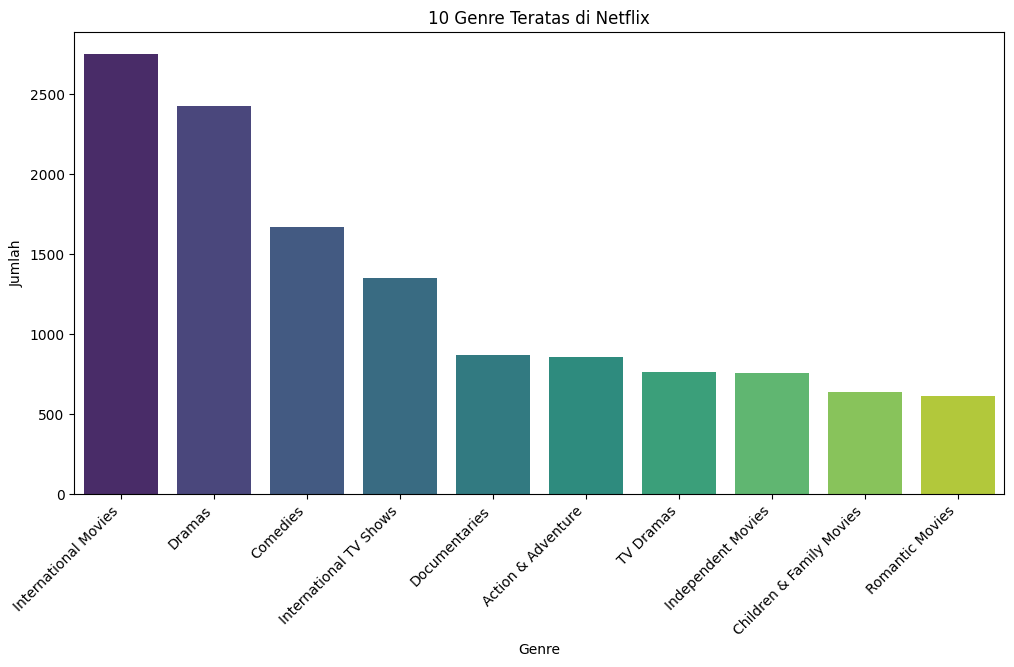

In [ ]:
plt.figure(figsize=(12, 6))

# Plot jumlah genre secara keseluruhan
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Jumlah")
plt.title("10 Genre Teratas di Netflix")
plt.show()

## Genre antara Movie dan TV Show

<ipython-input-30-be61acec0284>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_movie_genres.index, y=top_movie_genres.values, palette="Blues_r")
<ipython-input-30-be61acec0284>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_movie_genres.index, rotation=45, ha="right")
<ipython-input-30-be61acec0284>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=top_tv_genres.index, y=top_tv_genres.values, palette="Reds_r")
<ipython-input-30-be61acec0284>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

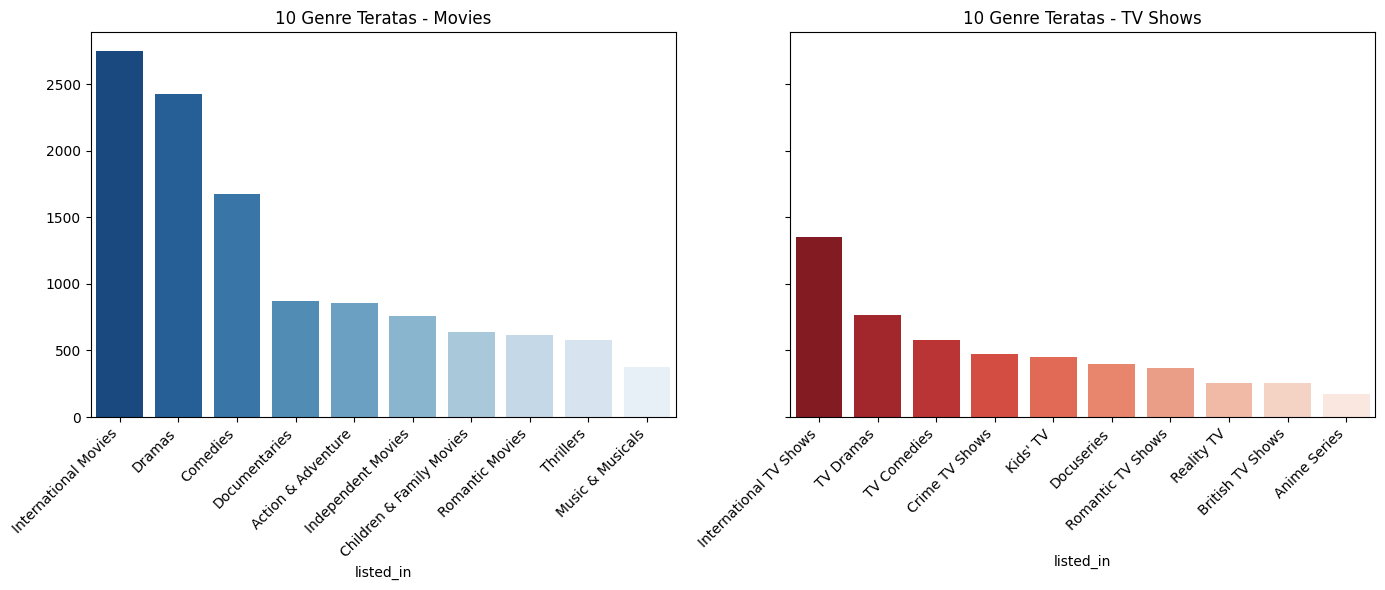

In [ ]:
# Membandingkan genre antara Movie dan TV Show
top_movie_genres = movie_genre_counts.head(10)
top_tv_genres = tv_genre_counts.head(10)

# Membuat dua subplot untuk perbandingan
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot untuk Movie
sns.barplot(ax=axes[0], x=top_movie_genres.index, y=top_movie_genres.values, palette="Blues_r")
axes[0].set_title("10 Genre Teratas - Movies")
axes[0].set_xticklabels(top_movie_genres.index, rotation=45, ha="right")

# Plot untuk TV Shows
sns.barplot(ax=axes[1], x=top_tv_genres.index, y=top_tv_genres.values, palette="Reds_r")
axes[1].set_title("10 Genre Teratas - TV Shows")
axes[1].set_xticklabels(top_tv_genres.index, rotation=45, ha="right")

# Menampilkan plot
plt.tight_layout()
plt.show()

## Mencari K-Optimal

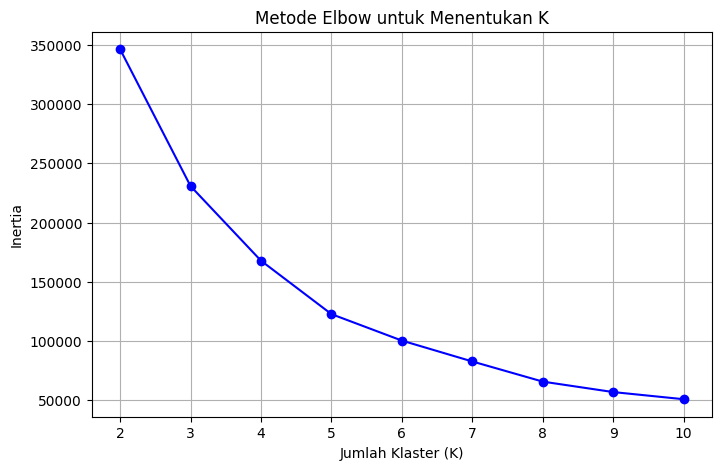

In [ ]:
# Menentukan Jumlah Cluster (K) dengan Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualisasi Metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## Menentukan Cluster Optimal dengan Silhouette Score

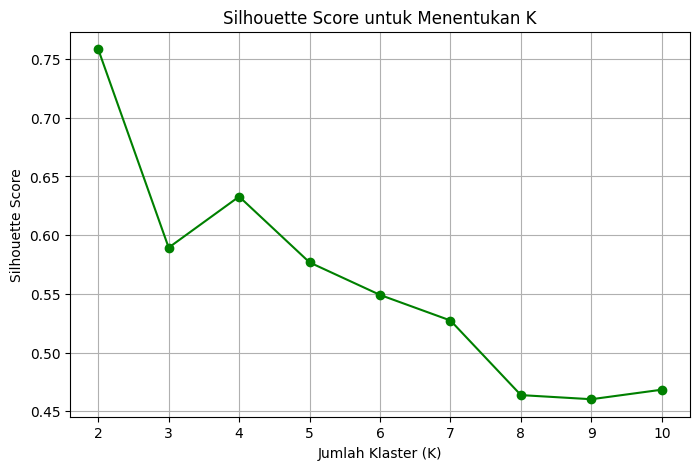

In [ ]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## Cluster dengan K-Optimal

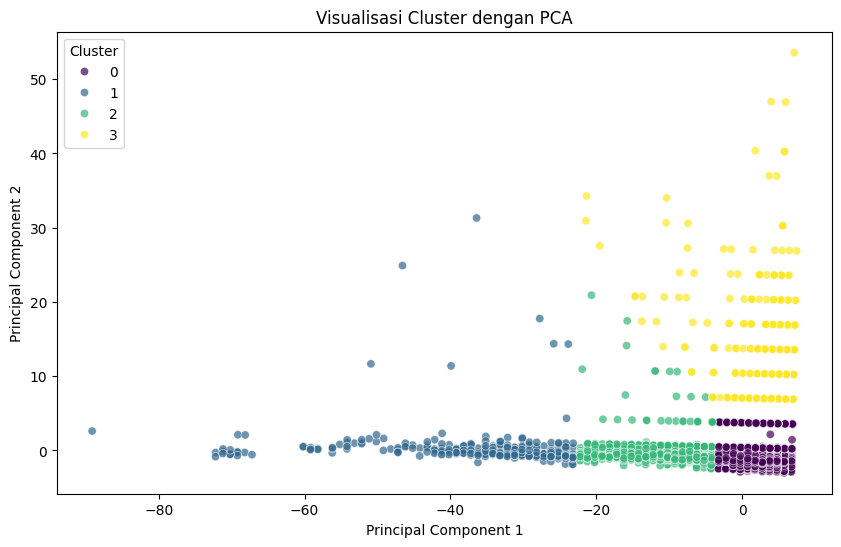

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X)

# Visualisasi Clustering dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["pca1"], y=df["pca2"], hue=df["cluster"], palette="viridis", alpha=0.7)
plt.title("Visualisasi Cluster dengan PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## Menyimpan Hasil Cluster

In [ ]:
df.to_csv('netflix_with_clusters.csv', index=False)

## Menampilkan Data per Cluster

In [ ]:
df[['listed_in', 'duration_hours', 'cluster']].sample(10)

,listed_in,duration_hours,cluster
8684,"Kids' TV, Korean TV Shows",10.000000,3
820,"International TV Shows, TV Dramas, TV Mysteries",10.000000,3
3532,"Comedies, Independent Movies, International Mo...",2.216667,0
590,"Anime Series, Kids' TV",10.000000,3
4537,"Dramas, International Movies",2.016667,0
2846,"International TV Shows, Romantic TV Shows, Spa...",13.333333,3
1886,Documentaries,1.400000,0
2440,Children & Family Movies,0.400000,0
4971,"Dramas, International Movies",1.650000,0
2676,"Crime TV Shows, International TV Shows, TV Act...",10.000000,3


## Model Machine Learning

In [ ]:
df['cluster'] = kmeans.labels_  # Menggunakan hasil clustering yang sudah dilakukan

# Pilih fitur dan target
features = df[['release_year', 'duration_hours', 'cluster']]  # Tambahkan cluster
target = df['type'].map({'Movie': 0, 'TV Show': 1})  # Konversi ke numerik

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Latih Model Machine Learning (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

## Evaluasi Model

Accuracy (dengan clustering): 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       0.99      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



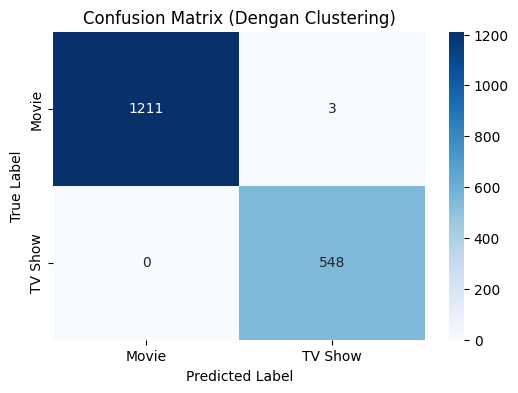

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (dengan clustering): {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Dengan Clustering)')
plt.show()

### **Berdasarkan hasil cross-validation :**
- Akurasi Tinggi: Skor cross-validation yang dihasilkan berada pada kisaran sangat tinggi, antara 0.9977 hingga 1.0 untuk setiap fold. Hal ini menunjukkan bahwa model sangat baik dalam memprediksi data, dengan tingkat akurasi yang sangat konsisten di seluruh data uji.

- Akurasi Rata-Rata (Mean): Rata-rata akurasi dari hasil cross-validation adalah 0.99898, yang menunjukkan bahwa model bekerja sangat baik secara keseluruhan, hampir mencapai akurasi sempurna.

- Stabilitas Model: Skor yang sangat seragam pada setiap fold (0.9994, 0.9988, 0.9977) menunjukkan bahwa model tidak hanya akurat, tetapi juga stabil dan tidak mengalami overfitting pada data pelatihan.

## Cek Apakah Hasil Overfitting

In [ ]:
from sklearn.model_selection import cross_val_score

# Melakukan k-fold cross-validation
cross_val_scores = cross_val_score(clf, X, target, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean Cross-validation score: {cross_val_scores.mean()}")

Cross-validation scores: [0.99943246 0.99943246 0.99886428 0.99772856 0.99943214]
Mean Cross-validation score: 0.9989779824047451


## Pengotimalan Dengan Hyperparameter

In [ ]:
# Definisikan parameter distribusi untuk RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimal untuk memecah node
    'min_samples_leaf': [1, 2, 4],  # Jumlah sampel minimal untuk node daun
    'bootstrap': [True, False]  # Memutuskan apakah menggunakan bootstrap sampling
}

# Inisialisasi RandomizedSearchCV
grid_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42,
                                   scoring='accuracy')

# Melatih model dengan RandomizedSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluasi pada test set menggunakan model terbaik dari GridSearchCV
y_pred_grid = grid_search.best_estimator_.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy with GridSearchCV: {accuracy_grid:.2f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters from Grid Search: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best Cross-Validation Accuracy: 0.998722498225692
Accuracy with GridSearchCV: 1.00


## Visualisasi Hyperparameter

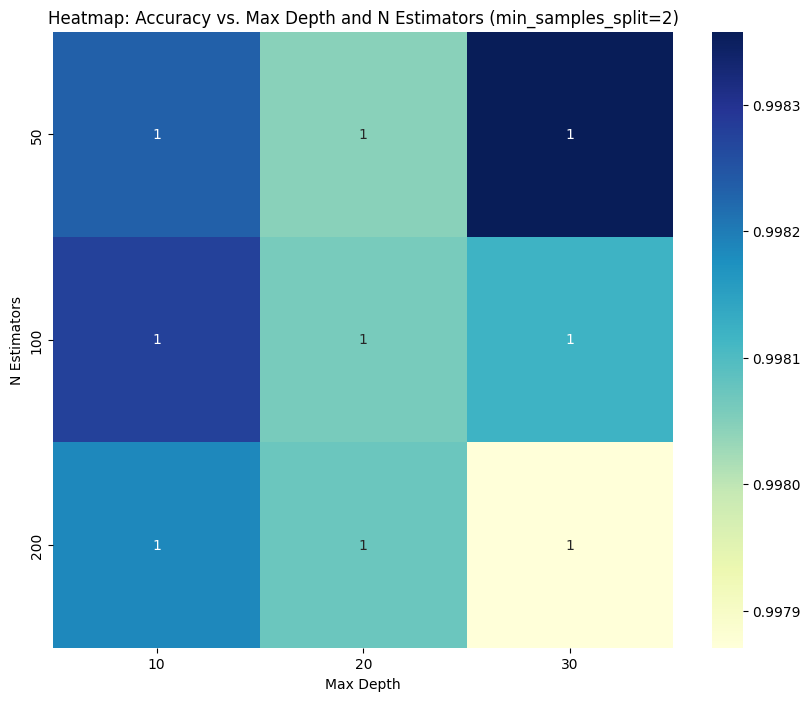

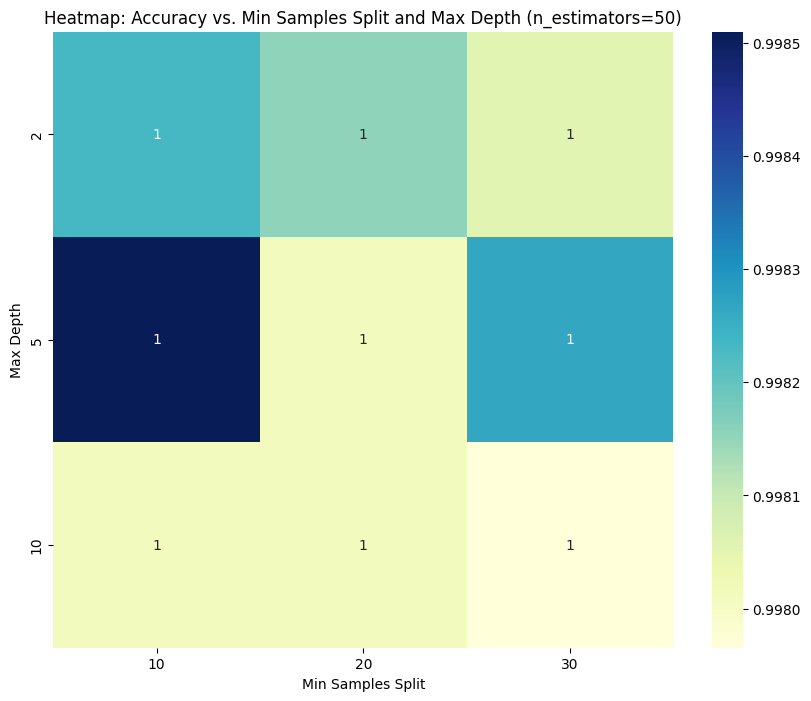

In [ ]:
# Visualisasi Heatmap Parameter Grid
results = grid_search.cv_results_

# Ambil parameter grid yang diuji dan akurasi
param_n_estimators = results['param_n_estimators'].data
param_max_depth = results['param_max_depth'].data
param_min_samples_split = results['param_min_samples_split'].data
mean_test_scores = results['mean_test_score']

# Buat DataFrame untuk visualisasi
import pandas as pd
df_results = pd.DataFrame({
    'n_estimators': param_n_estimators,
    'max_depth': param_max_depth,
    'min_samples_split': param_min_samples_split,
    'mean_test_score': mean_test_scores
})

# Heatmap 1: n_estimators vs max_depth (min_samples_split tetap)
pivot_table1 = df_results.pivot_table(values='mean_test_score', index='n_estimators', columns='max_depth')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table1, annot=True, cmap='YlGnBu')
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.title('Heatmap: Accuracy vs. Max Depth and N Estimators (min_samples_split=2)')
plt.show()

# Heatmap 2: min_samples_split vs max_depth (n_estimators tetap)
pivot_table2 = df_results.pivot_table(values='mean_test_score', index='min_samples_split', columns='max_depth')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table2, annot=True, cmap='YlGnBu')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Heatmap: Accuracy vs. Min Samples Split and Max Depth (n_estimators=50)') # Adjust the title accordingly
plt.show()

## Bandingkan dengan Model Tanpa Clustering


Accuracy (tanpa clustering): 1.00
Classification Report (Tanpa Clustering):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1214
           1       0.99      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



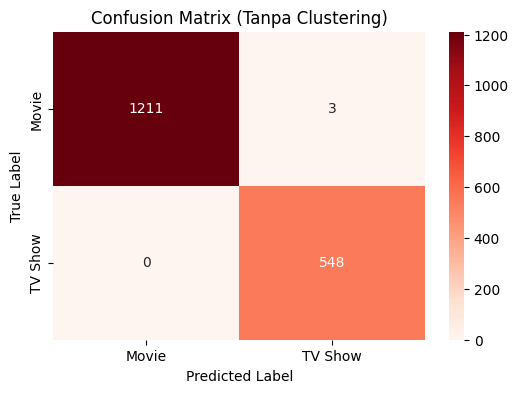

In [ ]:
# Latih model tanpa clustering
clf.fit(X_train, y_train)  # X_train tanpa fitur clustering

# Prediksi hasil menggunakan model tanpa clustering
y_pred = clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (tanpa clustering): {accuracy:.2f}")

# Classification Report
print("Classification Report (Tanpa Clustering):\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Tanpa Clustering)')
plt.show()

### **Kesimpulan dari Dua Confusion Matrix**
1. Confusion Matrix dengan Clustering
  - True Positives (Movie diklasifikasikan sebagai Movie): 1211
  - False Positives (TV Show diklasifikasikan sebagai Movie): 0
  - False Negatives (Movie diklasifikasikan sebagai TV Show): 3
  - True Negatives (TV Show diklasifikasikan sebagai TV Show): 548

2. Confusion Matrix tanpa Clustering
  - True Positives (Movie diklasifikasikan sebagai Movie): 1211
  - False Positives (TV Show diklasifikasikan sebagai Movie): 0
  - False Negatives (Movie diklasifikasikan sebagai TV Show): 3
  - True Negatives (TV Show diklasifikasikan sebagai TV Show): 548

3. Akurasi Sama:
  - Kedua model memberikan hasil yang identik, dengan jumlah kesalahan yang sangat kecil (hanya 3 Movie diklasifikasikan sebagai TV Show).
  - Tidak ada TV Show yang diklasifikasikan sebagai Movie.

4. Efektivitas Clustering:
  - Dalam kasus ini, penggunaan clustering tidak memberikan perubahan signifikan terhadap hasil klasifikasi.
  - Model dengan clustering memiliki performa yang sama dengan model tanpa clustering.

5. Kesimpulan Akhir:
    - Model dengan clustering tidak menunjukkan peningkatan akurasi dibandingkan model tanpa clustering.
    - Clustering mungkin lebih berguna untuk analisis eksploratif daripada meningkatkan akurasi dalam klasifikasi Movie dan TV Show.